In [17]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [18]:
product = 'rgpf'

In [19]:
list_files = glob.glob('/mnt/Data/Data/PF/'+product+'_raw/*.HDF')
list_files = sorted(list_files)
len_files = len(list_files)
print(f'{len_files} files found')
list_files[0:2]

85 files found


['/mnt/Data/Data/PF/rgpf_raw/pf_201403_level2.HDF',
 '/mnt/Data/Data/PF/rgpf_raw/pf_201404_level2.HDF']

In [24]:
list_files[10]

'/mnt/Data/Data/PF/rgpf_raw/pf_201501_level2.HDF'

In [25]:
data = ca.read_netcdf(list_files[10],2)

NFILES : (1,)
ORBIT : (480248,)
GRPNUM : (480248,)
KUPFGRPNUM : (480248,)
LAT : (480248,)
LON : (480248,)
ALTRK : (480248,)
ACTRK : (480248,)
CENTERTRK : (480248,)
ELEV : (480248,)
YEAR : (480248,)
MONTH : (480248,)
DAY : (480248,)
HOUR : (480248,)
NPIXELS : (480248,)
NPIXELS_20DBZ : (480248,)
NPIXELS_30DBZ : (480248,)
NPIXELS_40DBZ : (480248,)
NPIXELS_50DBZ : (480248,)
NPIXELS_20MM : (480248,)
NPIXELS_30MM : (480248,)
NPIXELS_40MM : (480248,)
NPIXELS_50MM : (480248,)
NPIXELS_100MM : (480248,)
NPIXELS_GMI : (480248,)
NRAINPIXELS_KU : (480248,)
NSNOWPIXELS_KU : (480248,)
NMIXPIXELS_KU : (480248,)
NRAINPIXELS_GMI : (480248,)
NSNOWPIXELS_GMI : (480248,)
VOLRAIN_KU : (480248,)
VOLSNOW_KU : (480248,)
VOLMIX_KU : (480248,)
VOLRAINES_KU : (480248,)
VOLRAIN_20DBZ : (480248,)
VOLRAIN_30DBZ : (480248,)
VOLRAIN_40DBZ : (480248,)
VOLRAIN_50DBZ : (480248,)
VOLRAIN_20MM : (480248,)
VOLRAIN_30MM : (480248,)
VOLRAIN_40MM : (480248,)
VOLRAIN_50MM : (480248,)
VOLRAIN_100MM : (480248,)
MAXPIA : (480248,)

In [13]:
list_var = ['NPIXELS_20DBZ', 'NPIXELS_30DBZ', 'NPIXELS_40DBZ', 'NPIXELS_50DBZ', 
            'NPIXELS_20MM', 'NPIXELS_30MM', 'NPIXELS_40MM', 'NPIXELS_50MM', 
            'NSNOWPIXELS_KU', 'NSNOWPIXELS_GMI',  
            'MIN85PCT','NLT250','NLT225','N37LT250','N37LT225',
            'MAXHT20','MAXHT30','MAXHT40',
            'NSTRAT_KU', 'NCONV_KU']

list_description = ['Number of radar pixels with 20 dBZ',
                    'Number of radar pixels with 30 dBZ',
                    'Number of radar pixels with 40 dBZ',
                    'Number of radar pixels with 50 dBZ',

                    'Number of radar pixels with precipitation greater than 20 mm',
                    'Number of radar pixels with precipitation greater than 30 mm',
                    'Number of radar pixels with precipitation greater than 40 mm',
                    'Number of radar pixels with precipitation greater than 50 mm',

                    'Number of Ku pixels with snowfall',
                    'Number of GMI pixels with snowfall',

                    'Minimum 85 GHz polarization correction TB (K)',
                    'Number of radar pixels with 89 GHz PCT < 250 (K)',
                    'Number of radar pixels with 89 GHz PCT < 225 (K)',
                    'Number of radar pixels with 37 GHz PCT < 250 (K)',
                    'Number of radar pixels with 37 GHz PCT < 225 (K)',

                    'Maximum height with 20 dBZ echo (km)',
                    'Maximum height with 30 dBZ echo (km)',
                    'Maximum height with 40 dBZ echo (km)',

                    'Number of stratiform pixels with Ku-band',
                    'Number of convective pixels with Ku-band',
                    ]

In [14]:
for nn in range(len_files):

    file_input = list_files[nn]
    print(file_input)

    data = ca.read_netcdf(file_input,1)
    lat = data['LAT'].data
    lon = data['LON'].data

    data_in = np.zeros([len(lat),len(list_var)])

    for t in range(len(list_var)):
        data_in[:,t] = data[list_var[t]].data

    pd_in = pd.DataFrame(data_in, columns=list_var)
    pd_in.insert(0, "lat", lat, True)
    pd_in.insert(1, "lon", lon, True)

    # South America Region
    out1 = pd_in[(pd_in['lon'] > -85) & (pd_in['lon'] < -30 )]
    out2 = out1[(out1['lat'] > -45) & (out1['lat'] < 15 )]

    # export dataframe to csv
    salida = '/mnt/Data/Data/PF/rgpf_SA/' + file_input.split('/')[-1].replace('.HDF','.csv').replace('pf',product)
    print(f'Exporting data to {salida}')
    out2.to_csv(salida,header=True,index=False)

    print()

/mnt/Data/Data/PF/rgpf_raw/pf_201403_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201403_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201404_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201404_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201405_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201405_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201406_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201406_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201407_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201407_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201408_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201408_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201409_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201409_level2.csv

/mnt/D

In [15]:
out2

,lat,lon,NPIXELS_20DBZ,NPIXELS_30DBZ,NPIXELS_40DBZ,NPIXELS_50DBZ,NPIXELS_20MM,NPIXELS_30MM,NPIXELS_40MM,NPIXELS_50MM,...,MIN85PCT,NLT250,NLT225,N37LT250,N37LT225,MAXHT20,MAXHT30,MAXHT40,NSTRAT_KU,NCONV_KU
830,12.291802,-31.702375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,284.083008,0.0,0.0,0.0,0.0,2.500,0.000,0.0,0.0,1.0
831,11.816883,-30.557055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.260010,0.0,0.0,0.0,0.0,2.625,0.000,0.0,0.0,1.0
2086,14.713903,-56.258194,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,284.615784,0.0,0.0,0.0,0.0,1.875,0.000,0.0,0.0,1.0
2088,14.569908,-56.299728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,283.204651,0.0,0.0,0.0,0.0,2.375,0.000,0.0,0.0,2.0
2089,14.413473,-56.456211,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,282.184387,0.0,0.0,0.0,0.0,3.125,2.625,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711275,-43.596939,-37.633965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,278.791901,0.0,0.0,0.0,0.0,2.500,0.000,0.0,0.0,0.0
711276,-43.858097,-37.352268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277.297913,0.0,0.0,0.0,0.0,3.000,0.000,0.0,0.0,1.0
711277,-44.974823,-37.432049,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,265.042175,0.0,0.0,0.0,0.0,5.000,2.750,0.0,73.0,1.0
711278,-44.104050,-37.199436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,278.528198,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0


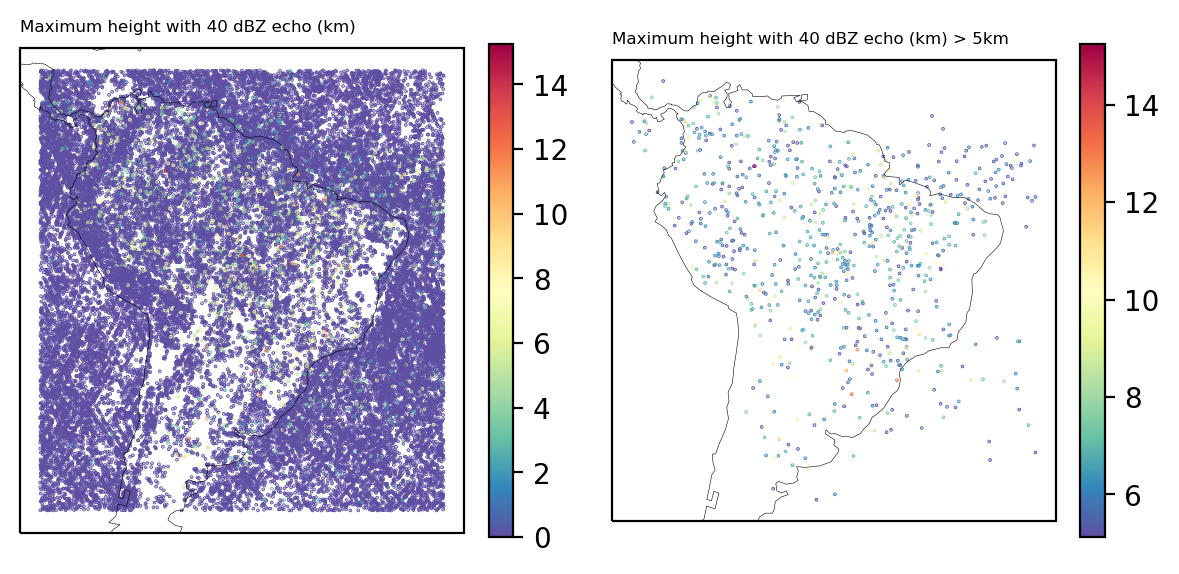

In [16]:
alt_ref = 5

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

levels = np.arange(0,15,3)

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
a1 = ax1.scatter(out2['lon'],out2['lat'],c=out2['MAXHT40'],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.05)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
a1 = ax1.scatter(out2['lon'][out2['MAXHT40']>alt_ref],out2['lat'][out2['MAXHT40']>alt_ref],c=out2['MAXHT40'][out2['MAXHT40']>alt_ref],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.05)